In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/content/ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


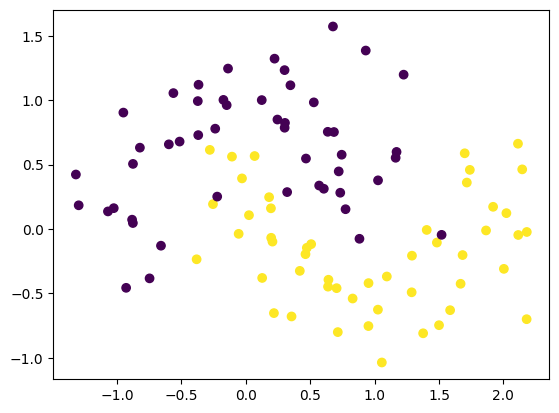

In [18]:
plt.scatter(df['3.159499363321345566e-02'],df['9.869877579082642072e-01'],c=df['0.000000000000000000e+00'])

In [19]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [20]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Ste parameters to 0
model.get_weights()

[array([[-0.15878284, -0.3583522 , -0.6025067 , -0.02262694,  0.43923122,
          0.57599884,  0.23772848,  0.23513979,  0.04973799, -0.6278238 ],
        [-0.1533007 ,  0.15232259,  0.3752045 ,  0.33010656, -0.32521334,
         -0.1714372 , -0.08698064,  0.68884224, -0.43530327, -0.15504968]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.54151624],
        [-0.32581997],
        [-0.6045944 ],
        [-0.23242056],
        [ 0.13878888],
        [ 0.37493068],
        [-0.22352725],
        [-0.22315979],
        [-0.38910854],
        [-0.4542016 ]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.5125 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4929 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4719 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4914 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4954 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5305 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss

In [ ]:
model.get_weights()

[array([[ 0.41220546,  0.41220546,  0.41220546,  0.41220546,  0.41220546,
          0.41220546,  0.41220546,  0.41220546,  0.41220546,  0.41220546],
        [-0.44849223, -0.44849223, -0.44849223, -0.44849223, -0.44849223,
         -0.44849223, -0.44849223, -0.44849223, -0.44849223, -0.44849223]],
       dtype=float32),
 array([-0.1362511 , -0.1362511 , -0.1362511 , -0.1362511 , -0.13625114,
        -0.13625114, -0.13625114, -0.13625114, -0.13625114, -0.13625114],
       dtype=float32),
 array([[0.05436615],
        [0.05436615],
        [0.05436615],
        [0.05436615],
        [0.05436615],
        [0.05436615],
        [0.05436615],
        [0.05436615],
        [0.05436615],
        [0.05436615]], dtype=float32),
 array([-0.06488006], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


<Axes: >

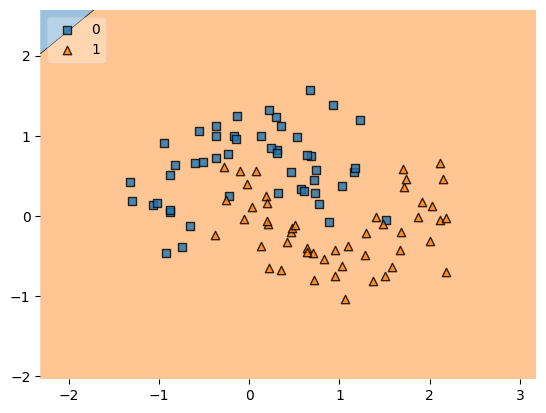

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [ ]:
# Set all parametrs to 1
model.get_weights()
initial_weights = model.get_weights()

In [23]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)
initial_weights[1] = np.ones(model.get_weights()[1].shape)
initial_weights[2] = np.ones(model.get_weights()[2].shape)
initial_weights[3] = np.ones(model.get_weights()[3].shape)
model.set_weights(initial_weights)
model.get_weights()

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.5383 - loss: 4.2551 - val_accuracy: 0.5000 - val_loss: 4.0677
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4914 - loss: 4.6090 - val_accuracy: 0.5000 - val_loss: 4.0508
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4875 - loss: 4.6423 - val_accuracy: 0.5000 - val_loss: 4.0343
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5266 - loss: 4.2960 - val_accuracy: 0.5000 - val_loss: 4.0178
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4836 - loss: 4.7223 - val_accuracy: 0.5000 - val_loss: 4.0011
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4914 - loss: 4.5946 - val_accuracy: 0.5000 - val_loss: 3.9845
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5539 - loss: 4.0209 - val_accuracy: 0.5000 - val_loss: 3.9680
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5032 - loss: 4.4460 - val_accuracy: 0.5000 - val_loss

In [26]:
model.get_weights()

[array([[1.1711464, 1.1711464, 1.1711464, 1.1711464, 1.1711464, 1.1711464,
         1.1711464, 1.1711464, 1.1711464, 1.1711464],
        [0.706291 , 0.706291 , 0.706291 , 0.706291 , 0.706291 , 0.706291 ,
         0.706291 , 0.706291 , 0.706291 , 0.706291 ]], dtype=float32),
 array([0.7139056, 0.7139056, 0.7139056, 0.7139056, 0.7139056, 0.7139056,
        0.7139056, 0.7139056, 0.7139056, 0.7139056], dtype=float32),
 array([[0.7098899],
        [0.7098899],
        [0.7098899],
        [0.7098899],
        [0.7098899],
        [0.7098899],
        [0.7098899],
        [0.7098899],
        [0.7098899],
        [0.7098899]], dtype=float32),
 array([0.7044446], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

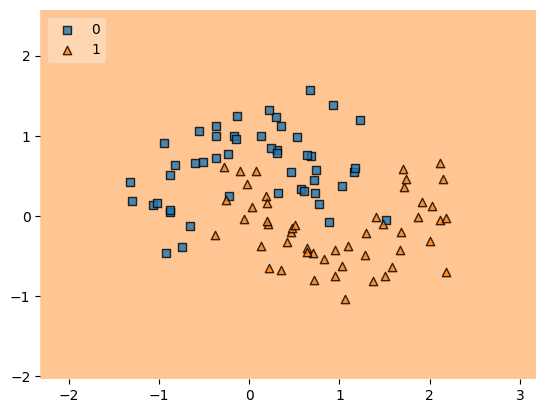

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)